Bifurcation ratio of fin V3 in fish 5: 1.026599
Measurements for fin V9 {2: 3.5355, 3: 4.4647, 4: 3.8693, 5: 3.7002, 6: 3.2775, 7: 3.3995}
Bifurcation distances of ray 5: [3.9636 3.4061 3.8173 4.2177 4.1243 3.5583 3.9698]
Bifurcation distances of fish 5: [   nan 3.991  4.66   4.4391 4.1243 3.8745 3.7557 3.3819 3.549  3.7002
 3.62   3.7657 3.7621 4.31   4.4215 4.534  4.0351    nan]
Bifurcation ratios of fish 5:  [       nan 1.11773991 0.73255365 1.10384988 1.06507771 1.02366757
 1.09002316 1.23773618 1.15795999 1.19115183 1.14461326 1.1418063
 1.18654475 1.14225058 1.02539862 1.02659903 0.82684444        nan]
Mean bifurcation ratios:  [       nan 1.10368618 1.00876337 1.0267927  1.13769024 1.04222358
 1.10456726 1.14708892 1.20058587 1.12260149 1.14179802 1.12365215
 1.18661252 1.18901731 1.10046648 1.10011188 1.13527321        nan]


/var/folders/ct/56ng5mfn2838m8d5d2bcd9ph0000gn/T/ipykernel_15786/640422468.py:100: RuntimeWarning: Mean of empty slice
  means = np.nanmean(ratios, axis=1)


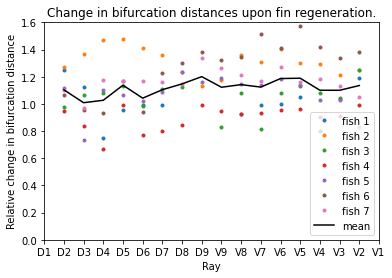

In [41]:
from os.path import join, abspath
from typing import NamedTuple, List, Dict
import numpy as np
import logging
import matplotlib.pyplot as plt


class FinMeasurements(NamedTuple):
    before: Dict[str, Dict[int, float]]
    after: Dict[str, Dict[int, float]]


def read_file(filename) -> List[str]:
    path = join(abspath(""), "data", filename)
    with open(path, "r") as f:
        return f.readlines()


def read_fin_measurement_file(filename) -> Dict[str, Dict[str, float]]:
    lines = read_file(filename)
    split_lines = (line.split() for line in lines)
    parsed_lines = (
        (int(id), ray, float(bifurcation_distance))
        for id, ray, bifurcation_distance in split_lines
    )
    fin_data = {}
    for id, ray, bifurcation_distance in parsed_lines:
        if ray not in fin_data:
            fin_data[ray] = {}
        fin_data[ray][id] = bifurcation_distance
    return fin_data


def read_fin_measurements() -> FinMeasurements:
    return FinMeasurements(
        before=read_fin_measurement_file("bif_before.txt"),
        after=read_fin_measurement_file("bif_after.txt"),
    )


def get_bifurcation_ratio(measurements: FinMeasurements, ray: str, id: int) -> float:
    return measurements.after[ray][id] / measurements.before[ray][id]


def get_bifurcation_distances(measurements: Dict[str, Dict[int, float]]) -> np.ndarray:
    order_d = [a + str(b) for a, b in zip(["D"] * 9, range(1, 10))]
    order_v = [a + str(b) for a, b in zip(["V"] * 9, range(9, 0, -1))]
    order = order_d + order_v
    fish_ids = range(1, 8)
    return np.array(
        [
            [
                measurements[ray][id] if id in measurements[ray] else np.nan
                for id in fish_ids
            ]
            if ray in measurements
            else np.zeros(len(fish_ids)) + np.nan
            for ray in order
        ]
    )


def ray_dictionary():
    rays = {}
    for i in range(9):
        s = "D" + str(i + 1)
        rays[s] = i
    for i in range(9):
        s = "V" + str(9 - i)
        rays[s] = i + 9
    return rays


def plotting(ratios, mean_ratios, ray_names):
    plt.figure()
    ax = plt.gca()
    # plot the bifurcation ratios for all the rays for one fish after the other
    for fishindex in range(ratios.shape[0 or 1]):
        ax.plot(ratios[:, fishindex], ".")
    ax.plot(mean_ratios, "k")
    plt.ylim([0, 1.6])
    plt.legend(
        ["fish 1", "fish 2", "fish 3", "fish 4", "fish 5", "fish 6", "fish 7", "mean"]
    )
    plt.title("Change in bifurcation distances upon fin regeneration.")
    plt.xlabel("Ray")
    plt.ylabel("Relative change in bifurcation distance")
    ax.set_xticks(range(len(ray_names)))
    ax.set_xticklabels(ray_names)


if __name__ == "__main__":
    logging.basicConfig(format="%(levelname)s: %(message)s", level=logging.INFO)
    measurements = read_fin_measurements()
    ratio = get_bifurcation_ratio(measurements, "V3", 5)
    print(f"Bifurcation ratio of fin V3 in fish 5: {ratio:.7}")
    print(f"Measurements for fin V9 {measurements.before['V9']}")
    bifurcation_distances = get_bifurcation_distances(measurements.before)
    print(f"Bifurcation distances of ray 5: {bifurcation_distances[4,:]}")
    print(f"Bifurcation distances of fish 5: {bifurcation_distances[:, 4]}")

    ratios = get_bifurcation_distances(measurements.after) / get_bifurcation_distances(
        measurements.before
    )
    print("Bifurcation ratios of fish 5: ", ratios[:, 4])
    means = np.nanmean(ratios, axis=1)
    print("Mean bifurcation ratios: ", means)

    plotting(ratios, means, ray_dictionary())
